In [1]:
import glob, json
import numpy as np
import pandas as pd
from scipy.stats import entropy
import sklearn.decomposition
import sklearn.manifold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

from lib import *
plt.style.use('../peptidome.mplstyle')

In [2]:
proteome = 'Humanviruses'
k = 9
all_data = {}
for i, model in enumerate(['independent', 'ncov', 'nskew', 'nskewfcov']):

    arr = np.load('../classifier/data/{proteome}_{model}_k{k}_likelihoods.npz'.format(proteome=proteome,
                                                                                      model=model, k=k))
    df = pd.read_csv('../maxent/data/{proteome}_{model}_k{k}_dkl.csv'.format(proteome=proteome,
                                                                             model=model, k=k),
                     index_col=0, squeeze=True)
    dkl = df.loc['DKL']
    data = {}

    logp_hh, logp_pp, logp_hp, logp_ph = arr['logp_hh'], arr['logp_pp'], arr['logp_hp'], arr['logp_ph']
    data['logp_hh'], data['logp_pp'], data['logp_hp'], data['logp_ph'] = logp_hh, logp_pp, logp_hp, logp_ph

    positive = logp_pp-logp_ph
    negative = logp_hp-logp_hh
    data['positive'] = np.sort(positive)*np.log10(np.exp(1))
    data['negative'] = np.sort(negative)*np.log10(np.exp(1))
    data['dkl'] = dkl
    
    all_data[model] = data

In [3]:
human_kmers = load_matrix('../maxent/data/Human_test_k{k}_matrix.csv.gz'.format(k=k))
pathogen_kmers = load_matrix('../maxent/data/{proteome}_test_k{k}_matrix.csv.gz'.format(proteome=proteome, k=k))

In [53]:
human_kmers_str = matrix_to_kmers(human_kmers)

In [54]:
pathogen_kmers_str = matrix_to_kmers(pathogen_kmers)

In [55]:
with open('data/human.txt', 'w') as f:
    for item in human_kmers_str[:100000]:
        f.write("%s\n" % item)

In [56]:
with open('data/pathogen.txt', 'w') as f:
    for item in pathogen_kmers_str[:100000]:
        f.write("%s\n" % item)

In [57]:
from lib.netmhcrunutils import run_netMHC

In [6]:
dfhla = pd.read_csv(datadir+'hlas.csv', sep='\t', skiprows=1)
hlas = dfhla['name']
#hlas = ['HLA-A0202']

In [130]:
for hla in hlas:
    run_netMHC('data/human.txt', 'data/human', hla, binder_only=False)

/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/human-HLA-A0211.csv -a HLA-A0211
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/human-HLA-A0212.csv -a HLA-A0212
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/human-HLA-A0216.csv -a HLA-A0216
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/human-HLA-A0217.csv -a HLA-A0217
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /home/amayer/repos/

/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/human-HLA-B1801.csv -a HLA-B1801
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/human-HLA-B2705.csv -a HLA-B2705
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/human-HLA-B2720.csv -a HLA-B2720
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/human-HLA-B3501.csv -a HLA-B3501
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/human.txt -xls -xlsfile /home/amayer/repos/

In [131]:
for hla in hlas:
    run_netMHC('data/pathogen.txt', 'data/pathogen', hla, binder_only=False)

/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-A0101.csv -a HLA-A0101
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-A0201.csv -a HLA-A0201
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-A0203.csv -a HLA-A0203
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-A0205.csv -a HLA-A0205
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -

/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-B0803.csv -a HLA-B0803
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-B1402.csv -a HLA-B1402
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-B1501.csv -a HLA-B1501
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-B1502.csv -a HLA-B1502
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -

/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-C1203.csv -a HLA-C1203
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-C1402.csv -a HLA-C1402
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-C1502.csv -a HLA-C1502
/home/amayer/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /home/amayer/repos/peptidome/code/netmhc/data/pathogen.txt -xls -xlsfile /home/amayer/repos/peptidome/code/netmhc/data/pathogen-HLA-E0101.csv -a HLA-E0101


In [59]:
proteome = 'Humanviruses'
model = 'nskewfcov'
arr = np.load('../classifier/data/{proteome}_{model}_k{k}_likelihoods.npz'.format(proteome=proteome,
                                                                                      model=model, k=k))
prob_ratio_pathogen = (arr['logp_pp'] - arr['logp_ph'])[:100000]
prob_ratio_human = (arr['logp_hp'] - arr['logp_hh'])[:100000]
prob_pathogen = arr['logp_pp'][:100000]
prob_human = arr['logp_hh'][:100000]

In [60]:
proteome = 'pathogen'
correlations_pathogen = []
correlations_pathogen_ratio = []
correlations_pathogen_ratio_abs = []

for hla in hlas:
    df = pd.read_csv('data/{proteome}-{hla}.csv'.format(proteome=proteome, hla=hla), sep='\t', skiprows=1)
    corr, pval = scipy.stats.spearmanr(prob_pathogen, np.array(df['nM']))
    correlations_pathogen.append(corr)
    corr, pval = scipy.stats.spearmanr(prob_ratio_pathogen, np.array(df['nM']))
    correlations_pathogen_ratio.append(corr)
    corr, pval = scipy.stats.spearmanr(np.abs(prob_ratio_pathogen), np.array(df['nM']))
    correlations_pathogen_ratio_abs.append(corr)

In [61]:
proteome = 'human'
correlations_human = []
correlations_human_ratio = []
correlations_human_ratio_abs = []
for hla in hlas:
    df = pd.read_csv('data/{proteome}-{hla}.csv'.format(proteome=proteome, hla=hla), sep='\t', skiprows=1)
#    q = np.quantile(df['nM'], 0.01)
    corr, pval = scipy.stats.spearmanr(prob_human, np.array(df['nM']))
    correlations_human.append(corr)
    corr, pval = scipy.stats.spearmanr(prob_ratio_human, np.array(df['nM']))
    correlations_human_ratio.append(corr)
    corr, pval = scipy.stats.spearmanr(np.abs(prob_ratio_human), np.array(df['nM']))
    correlations_human_ratio_abs.append(corr)

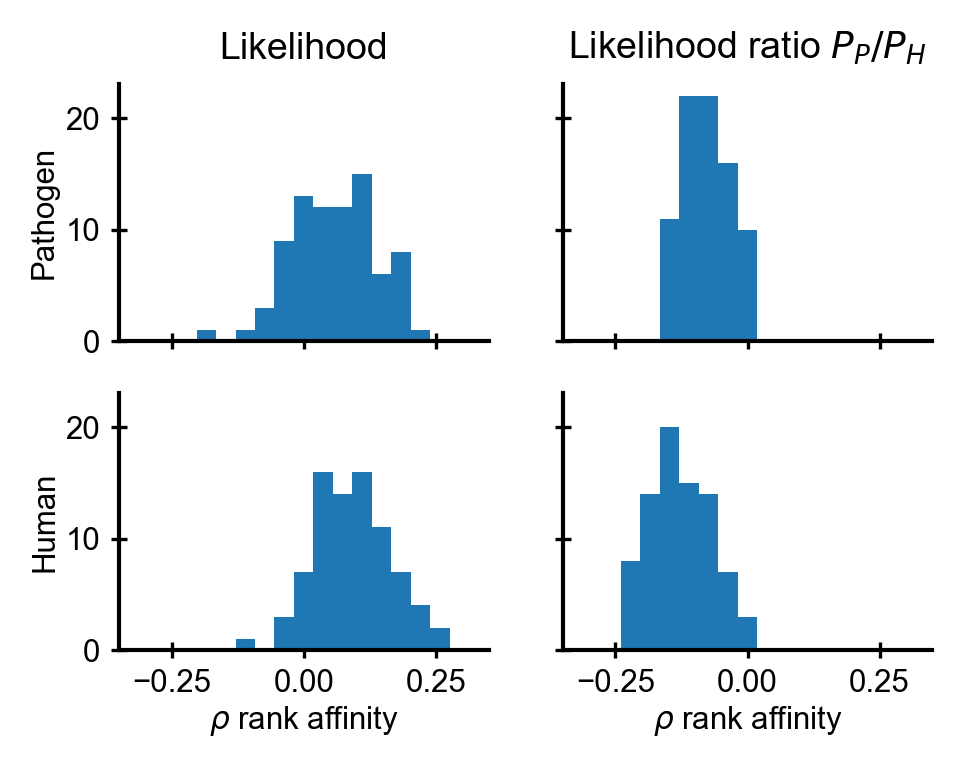

In [62]:
fig, axes = plt.subplots(figsize=(3.5, 2.5), nrows=2, ncols=2, sharex=True, sharey=True)
bins = np.linspace(-0.35, 0.35, 20)
axes[0, 0].hist(correlations_pathogen, bins=bins)
axes[0, 0].set_ylabel('Pathogen')
axes[0, 0].set_title('Likelihood')
axes[0, 1].hist(correlations_pathogen_ratio, bins=bins)
axes[0, 1].set_title('Likelihood ratio $P_P/P_H$')
#axes[0, 2].hist(correlations_pathogen_ratio_abs, bins=bins);
#axes[0, 2].set_title('Abs(Likelihood ratio)')
axes[1, 0].hist(correlations_human, bins=bins)
axes[1, 0].set_ylabel('Human')
axes[1, 1].hist(correlations_human_ratio, bins=bins)
#axes[1, 2].hist(correlations_human_ratio_abs, bins=bins);
axes[0, 0].set_xlim(min(bins), max(bins))
for i in range(2):
    axes[1, i].set_xlabel(r'$\rho$ rank affinity')
fig.savefig('netmhc_correlations.pdf')

# What fraction of all peptides binds?

In [95]:
for hla in hlas:
    df = pd.read_csv('data/{proteome}-{hla}.csv'.format(proteome=proteome, hla=hla),
                             sep='\t', skiprows=1)

    print(hla, df[df['N_binders']==1]['nM'].max())

HLA-A0101 6994.2
HLA-A0201 300.7
HLA-A0202 127.0
HLA-A0203 126.5
HLA-A0205 9239.9
HLA-A0206 187.9
HLA-A0207 20978.3
HLA-A0211 383.0
HLA-A0212 1526.5
HLA-A0216 1539.4
HLA-A0217 2599.5
HLA-A0219 2997.1
HLA-A0250 808.6
HLA-A0301 1077.2
HLA-A1101 629.6
HLA-A2301 1636.8
HLA-A2402 2394.2
HLA-A2403 1814.5
HLA-A2501 13020.4
HLA-A2601 6730.5
HLA-A2602 2997.5
HLA-A2603 9268.6
HLA-A2902 1319.1
HLA-A3001 904.1
HLA-A3002 1238.6
HLA-A3101 402.9
HLA-A3201 3465.4
HLA-A3207 2978.8
HLA-A3215 7756.6
HLA-A3301 1330.6
HLA-A6601 7616.4
HLA-A6801 404.8
HLA-A6802 424.9
HLA-A6823 2440.7
HLA-A6901 3869.6
HLA-A8001 11491.5
HLA-B0702 1454.6
HLA-B0801 1684.1
HLA-B0802 19124.4
HLA-B0803 16993.2
HLA-B1402 6027.9
HLA-B1501 448.8
HLA-B1502 5315.3
HLA-B1503 362.1
HLA-B1509 10669.2
HLA-B1517 1288.4
HLA-B1801 3006.5
HLA-B2705 933.4
HLA-B2720 3985.1
HLA-B3501 1378.9
HLA-B3503 23248.5
HLA-B3801 7229.0
HLA-B3901 4493.8
HLA-B4001 2621.6
HLA-B4002 1252.7
HLA-B4013 6437.0
HLA-B4201 2898.7
HLA-B4402 3691.8
HLA-B4403 2775.3
HLA-

In [98]:
pbinding = {}
for proteome in ['human', 'pathogen']:
    pbinding[proteome] = np.array([np.mean(pd.read_csv('data/{proteome}-{hla}.csv'.format(proteome=proteome, hla=hla),
                         sep='\t', skiprows=1)['nM']<500)
                              for hla in hlas])

In [129]:
df_pbinding = pd.DataFrame(dict(hla=hlas, human=pbinding['human'], pathogen=pbinding['pathogen']))
df_pbinding.head()

,hla,human,pathogen
0,HLA-A0101,0.00364,0.00445
1,HLA-A0201,0.03024,0.03497
2,HLA-A0202,0.05256,0.05775
3,HLA-A0203,0.04789,0.05610
4,HLA-A0205,0.00177,0.00254


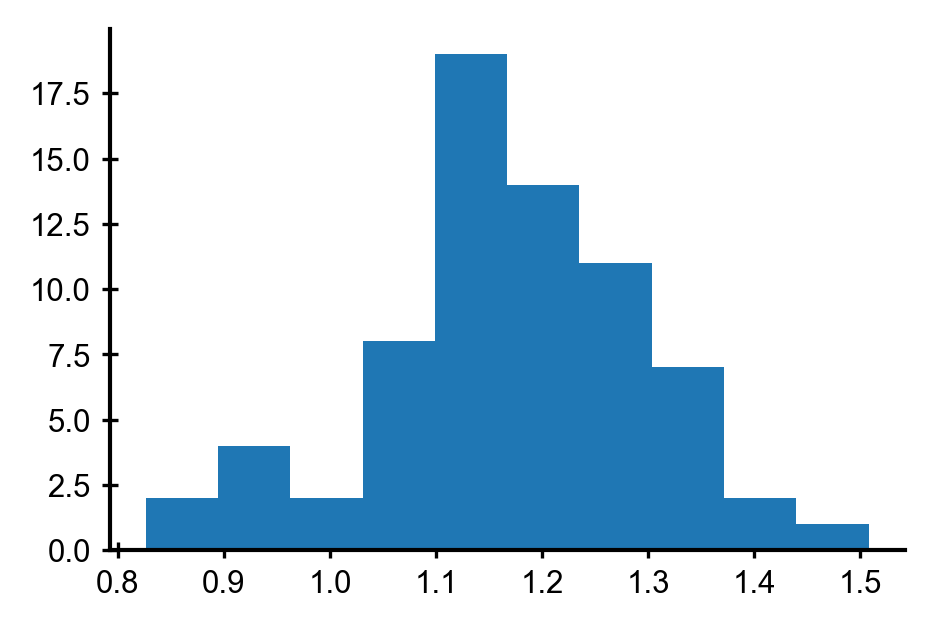

In [178]:
plt.hist(df_pbinding['ratio']);

In [168]:
pmin = 1e-3
df_pbinding = df_pbinding[(df_pbinding['human']>pmin) & (df_pbinding['pathogen']>pmin)]
df_pbinding['ratio'] = df_pbinding['pathogen']/df_pbinding['human']

In [169]:
df_pbinding['supertype'] = df_pbinding['hla'].apply(lambda s: s[4])

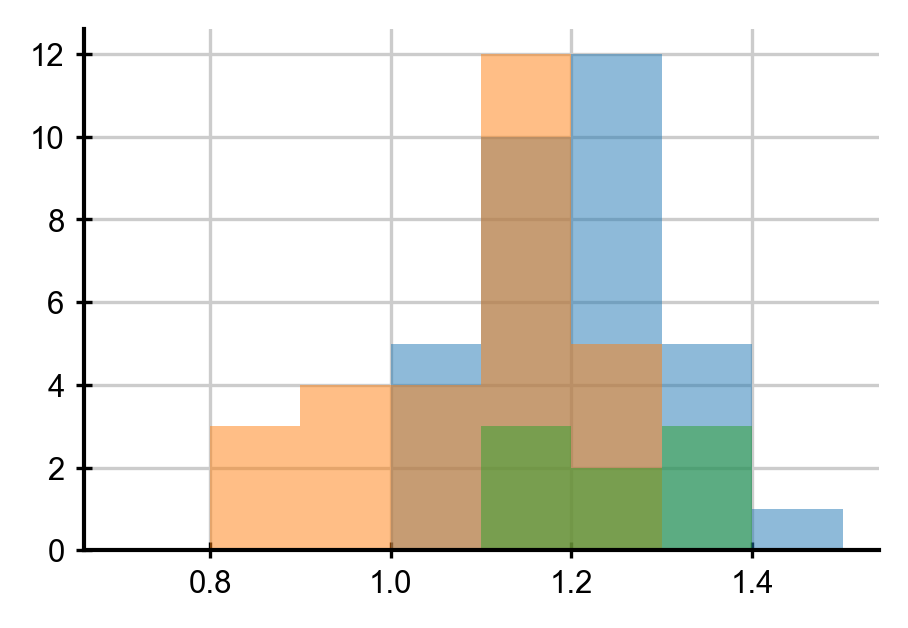

In [176]:
bins = np.arange(0.7, 1.6, 0.1)
df_pbinding.groupby('supertype')['ratio'].hist(bins=bins, histtype='stepfilled', alpha=.5);

# Regression with likelihoods

In [10]:
sys.path.append('/home/amayer/repos/tcr_space/code')
import tcrspacelib as tl

In [27]:
prob_ratios = {}
prob_ratios['human'] = prob_ratio_human
prob_ratios['pathogen'] = prob_ratio_pathogen

In [12]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

In [180]:
probs = dict(human=prob_human, pathogen=prob_pathogen)

HLA-A0202
human 0.05256
pathogen 0.05775


/home/amayer/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/stats/proportion.py:90: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


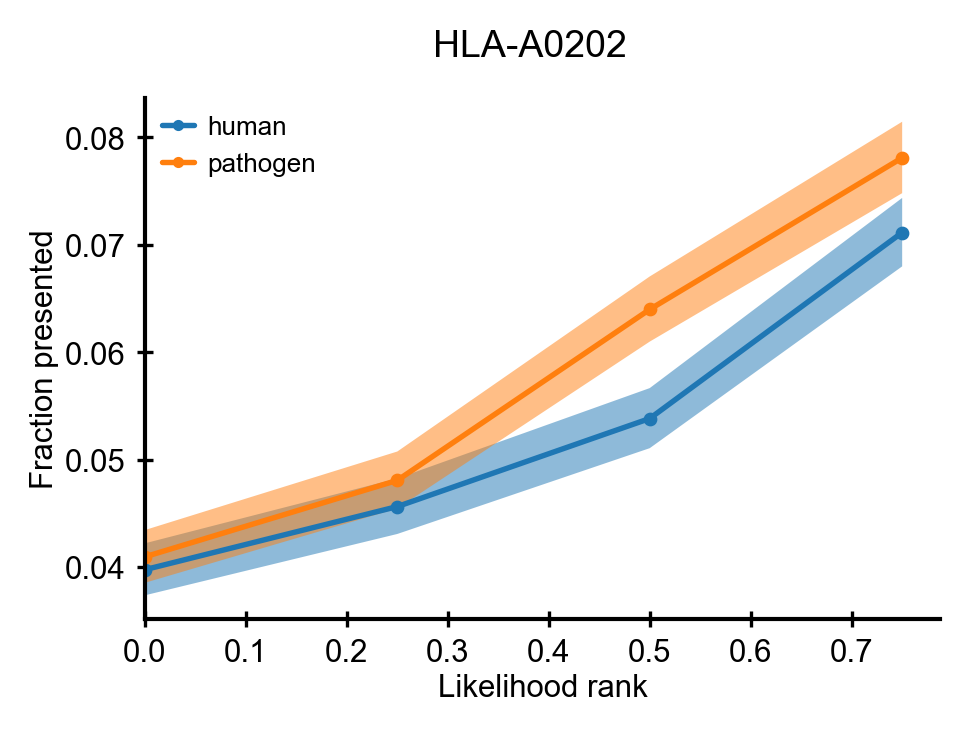

In [181]:
bins = histedges_equalN(probs['pathogen'], 10)[1:-1]
for hla in ['HLA-A0202']:#hlas.sample(10):
    print(hla)
    fig, ax = plt.subplots()
    fig.suptitle(hla)
    for proteome in ['human', 'pathogen']:
        #prob = prob_ratios[proteome]
        prob = probs[proteome]

        df = pd.read_csv('data/{proteome}-{hla}.csv'.format(proteome=proteome, hla=hla),
                         sep='\t', skiprows=1)
        print(proteome, np.mean(np.array(df['nM'])<500))
        bins = np.linspace(0, 1, 5)
        tl.regplot(scipy.stats.rankdata(prob)/len(prob),#prob,
                   np.array(df['nM'])<500, bins=bins, label=proteome)
    ax.set_xlabel('Likelihood rank')
    ax.set_ylabel('Fraction presented')
    ax.set_xlim(0.0)
    ax.legend()

HLA-A0202
pathogen 0.05775


/home/amayer/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/stats/proportion.py:90: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


pathogen 0.05775


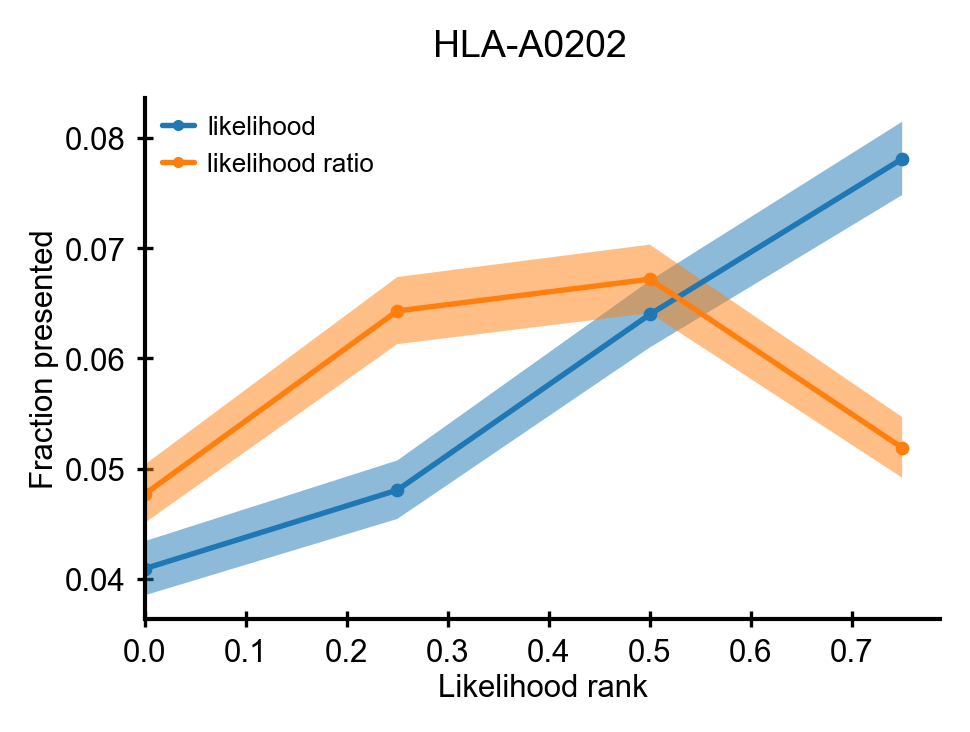

In [185]:
bins = histedges_equalN(probs['pathogen'], 10)[1:-1]
for hla in ['HLA-A0202']:#hlas.sample(10):
    print(hla)
    fig, ax = plt.subplots()
    fig.suptitle(hla)
    for prob, label in [(prob_pathogen, 'likelihood'), (prob_ratio_pathogen, 'likelihood ratio')]:
        df = pd.read_csv('data/{proteome}-{hla}.csv'.format(proteome=proteome, hla=hla),
                         sep='\t', skiprows=1)
        print(proteome, np.mean(np.array(df['nM'])<500))
        bins = np.linspace(0, 1, 5)
        tl.regplot(scipy.stats.rankdata(prob)/len(prob),
                   np.array(df['nM'])<500, bins=bins, label=label)
    ax.set_xlabel('Likelihood rank')
    ax.set_ylabel('Fraction presented')
    ax.set_xlim(0.0)
    ax.legend()

<AxesSubplot:>

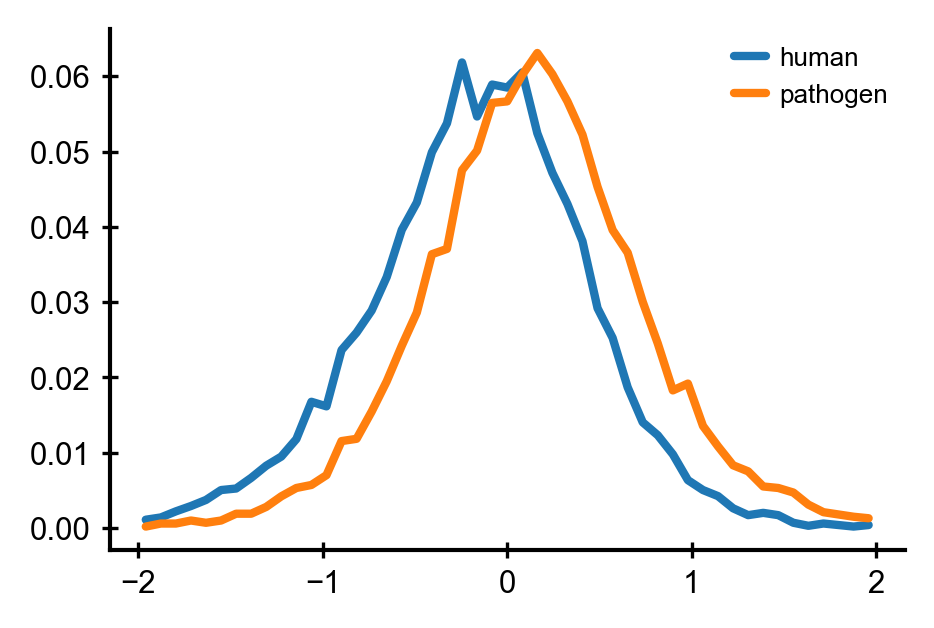

In [10]:
fig, ax = plt.subplots()
plot_histograms([prob_ratio_human, prob_ratio_pathogen],
                ['human', 'pathogen'],
                nbins=50, lw=2,
                xmin=-2, xmax=2, ax=ax, step=False)

In [13]:
background = np.mean(prob_ratio_pathogen) - np.mean(prob_ratio_human)

In [14]:
dkls = []
ratios = []
for hla in dfhla['name']:
    dfs = {}
    for proteome in ['human', 'pathogen']:
        df = pd.read_csv('data/{proteome}-{hla}.csv'.format(proteome=proteome, hla=hla), sep='\t', skiprows=1)
        dfs[proteome] = df
    ratio = np.sum(dfs['pathogen']['Rank'] < 10)/np.sum(dfs['human']['Rank'] < 10)
    ratios.append(ratio)
    dkl = np.mean(prob_ratio[dfs['pathogen']['Rank'] < 1]) - np.mean(prob_ratio_human[dfs['human']['Rank'] < 1])
    dkls.append(dkl)
    #print(hla, dkl, dp)

NameError: name 'prob_ratio' is not defined

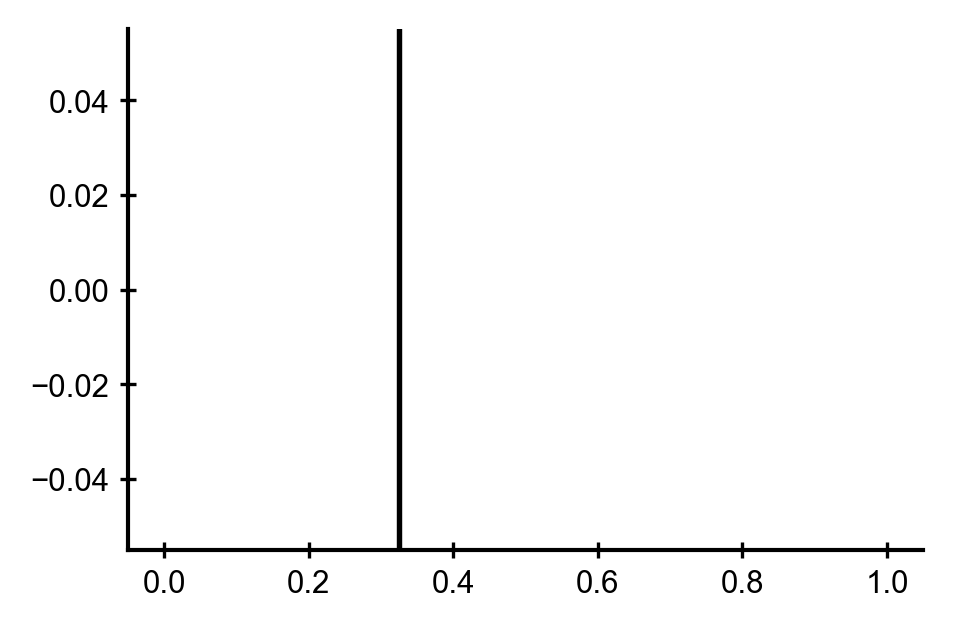

In [15]:
plt.hist(dkls)
plt.axvline(background, color='k');

NameError: name 'neg_ratio' is not defined

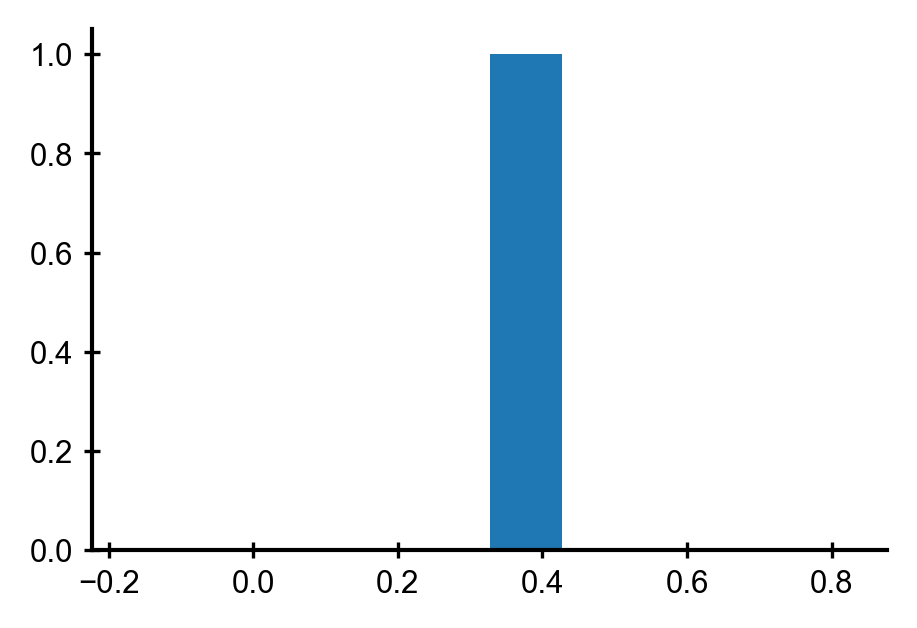

In [16]:
plt.hist(np.log2(ratios))
top_ratio = all_data['nskewfcov']['positive']
top_ratio = np.mean(neg_ratio[-int(0.1*len(neg_ratio)):])/np.log(2)
plt.axvline(top_ratio)

In [17]:
proteome = 'Humanviruses'
data = {}
for model in ['independent', 'nskewfcov']:
    arr = np.load('../classifier/data/{proteome}_{model}_k{k}_likelihoods.npz'.format(proteome=proteome,
                                                                                      model=model, k=k))
    data[model] = arr['logp_hh']

In [18]:
density_scatter(data['independent'], data['nskewfcov'])

<AxesSubplot:>

Error in callback <function flush_figures at 0x7fa406a45310> (for post_execute):


KeyboardInterrupt: 

In [ ]:
scipy.stats.spearmanr(data['independent'], data['nskewfcov'])

In [38]:
dfiedb = load_iedb_tcellepitopes(human_only=True)

In [41]:
dfiedb['MHC', 'Allele Name'].value_counts().head(30)

HLA class II                         68712
HLA-A*02:01                           9827
HLA class I                           9091
HLA-A2                                3603
HLA-DR                                2813
HLA-A*11:01                           2141
HLA-A*24:02                           2015
HLA-DRB1*01:01                        1938
HLA-DRB1*04:01                        1868
HLA-A*03:01                           1769
HLA-Class II, allele undetermined     1753
HLA-A*33:01                           1615
HLA-A*33:03                           1604
HLA-A*68:01                           1438
HLA-DRB1*15:01                        1346
HLA-B*07:02                           1319
HLA-B*40:01                           1223
HLA-A*23:01                           1202
HLA-A*01:01                           1179
HLA-B*37:01                           1176
HLA-A*24:07                           1175
HLA-B*40:02                           1165
HLA-B*49:01                           1062
HLA-B*44:02